In [1]:
import scanpy as sc
import squidpy as sq
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
from matplotlib_scalebar.scalebar import ScaleBar
import os

import cell2location
import scvi

DPI=300
FONTSIZE=20 #42
sc.settings.set_figure_params(scanpy = True, dpi=100, transparent=True, vector_friendly = True, dpi_save=DPI) 
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42

from matplotlib import rcParams
import seaborn as sns
from pathlib import Path

# QC utils functions - a package 
from vistools import utils
from vistools import spatial_plots

Global seed set to 0


In [2]:
SAMPLE_NAME = "Valdeolivas_2023_SN123_A595688_Rep1" #"Valdeolivas_2023_SN84_A120838_Rep2" #'Valdeolivas_2023_SN124_A595688_Rep2' #'Valdeolivas_2023_SN123_A595688_Rep1' #'Valdeolivas_2023_SN84_A120838_Rep2' #'Valdeolivas_2023_SN84_A120838_Rep1'#'Valdeolivas_2023_SN84_A120838_Rep1' #'Valdeolivas_2023_SN048_A416371_Rep2' #'Valdeolivas_2023_SN048_A416371_Rep1'

In [3]:
# store results 
DIR2SAVE = Path(f'/data/BCI-CRC/nasrine/data/CRC/spatial/public/Visium_Valdeolivas_2023/qc/{SAMPLE_NAME}') # to change
DIR2SAVE.mkdir(parents=True, exist_ok=True)

In [4]:
# figures
FIG2SAVE = DIR2SAVE.joinpath('figures/')
FIG2SAVE.mkdir(parents=True, exist_ok=True)
# set the global variable: sc.settings.figdir to save all plots 
sc.settings.figdir = FIG2SAVE

In [5]:
# load sp data
adata_vis = sc.read_h5ad(DIR2SAVE.joinpath(f"{SAMPLE_NAME}_raw.h5ad"))
adata_vis.obs.head(5)

,in_tissue,array_row,array_col,Sample,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,Sample_source,n_genes,Pathologist Annotation
spot_id,,,,,,,,,,,,,,,,,
Count_SN84_A120838_Rep2_AAACGAGACGGTTGAT-1,1,35,79,Count_SN84_A120838_Rep2,3111,7602.0,26.913970,35.780058,44.790845,58.326756,953.0,12.536174,1381.0,18.166273,Valdeolivas_2023_SN84_A120838_Rep2-Count_SN84_...,3021,stroma_fibroblastic_IC_high
Count_SN84_A120838_Rep2_AAACTCGTGATATAAG-1,1,23,113,Count_SN84_A120838_Rep2,4315,9689.0,16.482609,25.007741,33.398700,46.661162,128.0,1.321086,1746.0,18.020435,Valdeolivas_2023_SN84_A120838_Rep2-Count_SN84_...,4220,tumor&stroma_IC med to high
Count_SN84_A120838_Rep2_AAACTGCTGGCTCCAA-1,1,45,67,Count_SN84_A120838_Rep2,4899,13706.0,18.466365,27.622939,37.698818,51.072523,355.0,2.590107,2238.0,16.328615,Valdeolivas_2023_SN84_A120838_Rep2-Count_SN84_...,4803,stroma_fibroblastic_IC_med
Count_SN84_A120838_Rep2_AAAGTGTGATTTATCT-1,1,44,94,Count_SN84_A120838_Rep2,1333,2091.0,20.181731,29.268293,40.841703,60.162602,77.0,3.682449,277.0,13.247250,Valdeolivas_2023_SN84_A120838_Rep2-Count_SN84_...,1246,stroma_fibroblastic_IC_med
Count_SN84_A120838_Rep2_AAAGTTGACTCCCGTA-1,1,42,96,Count_SN84_A120838_Rep2,2430,4847.0,21.972354,30.513720,40.561172,56.220342,111.0,2.290076,591.0,12.193110,Valdeolivas_2023_SN84_A120838_Rep2-Count_SN84_...,2341,stroma_fibroblastic_IC_med


In [6]:
# load formatted and clean annotations
annot_path = Path(f"/data/BCI-CRC/nasrine/data/CRC/spatial/public/Visium_Valdeolivas_2023/cell2loc_pathologist_annotations/SN048_A416371_SN84_A120838_SN123_A595688/")

annot = pd.read_csv(annot_path.joinpath("cell2loc_mrna_abundance_pathological_annotations.csv"),
                    sep='\t',
                     header=0,
                 index_col=0)
annot.head(5)

,in_tissue,array_row,array_col,Sample,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,UPR,cDC1,cDC2,gdT,ipEMT,migDC,pDC,pEMT,Pathologist Annotation grouped,Pathologist Annotations
spot_id,,,,,,,,,,,,,,,,,,,,,
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1,1,50,102,Count_SN048_A416371_Rep1,3447,6769.0,15.068696,22.972374,32.323829,47.215246,...,53,24,4,16,1958,22,2,915,tumor&stroma_IC med to high,NaN
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1,1,59,19,Count_SN048_A416371_Rep1,3706,8120.0,16.293103,24.445813,33.953202,48.374384,...,32,211,11,10,8041,15,5,78,tumor&stroma_IC med to high,NaN
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1,1,14,94,Count_SN048_A416371_Rep1,3809,7946.0,14.510446,22.048830,30.820539,45.117040,...,4,2,1,0,7,2,1,1,tumor&stroma_IC med to high,NaN
Count_SN048_A416371_Rep1_AAACAGCTTTCAGAAG-1,1,43,9,Count_SN048_A416371_Rep1,4381,10030.0,15.393819,23.110668,32.472582,46.749751,...,34,207,275,8,7570,13,26,21,tumor,NaN
Count_SN048_A416371_Rep1_AAACAGGGTCTATATT-1,1,47,13,Count_SN048_A416371_Rep1,1581,2543.0,17.066457,26.386158,38.969721,57.491152,...,11,111,5,6,1394,5,10,32,stroma_fibroblastic_IC high,NaN


In [7]:
adata_vis.obs = adata_vis.obs.merge(annot[['Pathologist Annotation grouped']],
                    how='left',
                    left_index=True,
                    right_index=True
                   )

In [8]:
adata_vis.shape

(1048, 17326)

In [9]:
# only select spots with valid annotations
adata_vis = adata_vis[~adata_vis.obs['Pathologist Annotation grouped'].isin(['exclude', '', np.nan,
                                                                             'IC aggregate_stroma or muscularis'])].copy()
adata_vis.shape

(851, 17326)

In [10]:
adata_vis.obs['Pathologist Annotation grouped'].unique()

array(['stroma_fibroblastic_IC_high', 'tumor&stroma_IC med to high',
       'stroma_fibroblastic_IC_med', 'tumor', 'tumor&stroma_IC low',
       'stroma_fibroblastic_IC low'], dtype=object)

In [11]:
adata_vis.obs['Pathologist Annotation grouped'].value_counts()

tumor                          232
stroma_fibroblastic_IC_high    226
tumor&stroma_IC med to high    144
stroma_fibroblastic_IC_med     113
stroma_fibroblastic_IC low      69
tumor&stroma_IC low             67
Name: Pathologist Annotation grouped, dtype: int64

In [12]:
palette_tissues_dict = {
    'tumor&stroma_IC med to high':'#E88BC4',
    'tumor':'#FDB462',
    'stroma_fibroblastic_IC high':'#8BE2E8',
    'stroma_fibroblastic_IC_high': '#8BE2E8',
    'stroma_fibroblastic_IC med':'#67A9CF',
    'stroma_fibroblastic_IC_med': '#67A9CF',
    'tumor&stroma_IC low':'#5DCFBB',
    'IC aggregate_stroma or muscularis': '#FEED8B',
    'stroma_fibroblastic_IC low': '#91CF60',
    'tumor&stroma': '#937F8C'
}


In [13]:
colors = [palette_tissues_dict[t] for t in sorted(set(adata_vis.obs['Pathologist Annotation grouped']))]
colors

['#91CF60', '#8BE2E8', '#67A9CF', '#FDB462', '#5DCFBB', '#E88BC4']

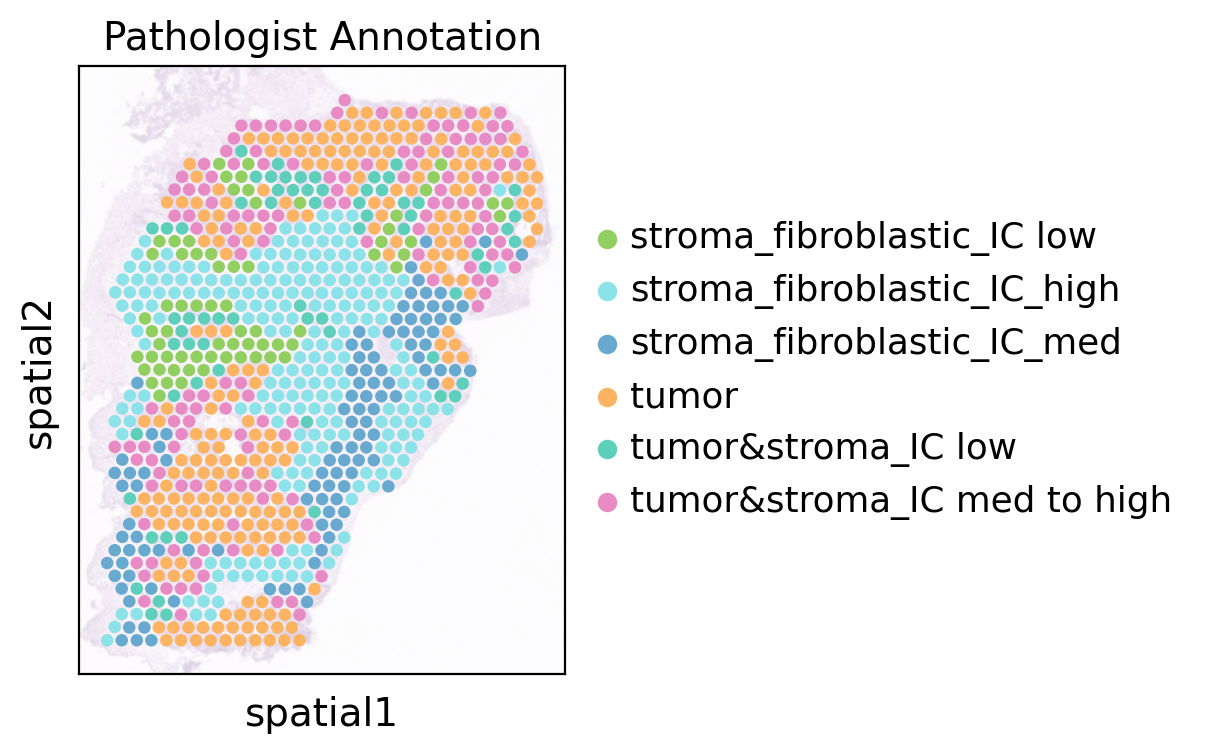

In [14]:
sc.pl.spatial(adata_vis, color="Pathologist Annotation grouped", palette=colors, alpha_img=0.2,
              size=1.3, title="Pathologist Annotation", save="Pathologist_annotations_after_QC.pdf")

In [15]:
adata_vis.write(DIR2SAVE.joinpath(f"{SAMPLE_NAME}_raw_annotations.h5ad"))

In [16]:
DIR2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/spatial/public/Visium_Valdeolivas_2023/qc/Valdeolivas_2023_SN84_A120838_Rep2')

In [17]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/spatial/public/Visium_Valdeolivas_2023/qc/Valdeolivas_2023_SN84_A120838_Rep2/figures')